In [2]:
library(ggplot2)
library(ggplotify)
library(pheatmap)
library(stringr)
library(tidyverse)
library(UpSetR)
library(ggupset)
library(cowplot)
library(patchwork)
library(ggpubr)
library(ggmsa)
library(Biostrings)
library(readxl)
library(caret)
library(randomForest)
library(DESeq2)
library(ggalluvial)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp



Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots



Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend


ggmsa v1.14.1  Document: http://yulab-smu.top/ggmsa/

If you use ggmsa in published research, please cite:
L Zhou, T Feng,

In [3]:
files <- list.files("06_expr/",pattern="gtf")

In [4]:
fpkm <- NULL
for(f in files){
    re <- read.table(paste0("06_expr/",f),header=T,sep="\t")
    re <- re %>%
        dplyr::select(Gene=Gene.ID,FPKM) %>%
        mutate(Sample=gsub(".gtf","",f))
    fpkm <- rbind(fpkm,re)
}

In [5]:
fpkm <- spread(fpkm,Sample,FPKM)

`summarise()` has grouped output by 'Gene'. You can override using the `.groups` argument.
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


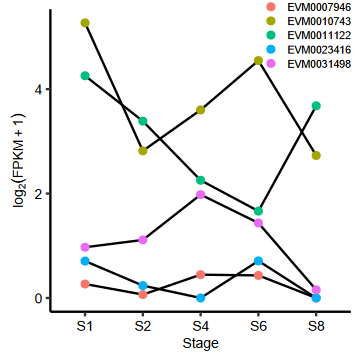

In [6]:
options(repr.plot.width=3, repr.plot.height=3)
Figure6A <- fpkm %>%
    dplyr::filter(Gene %in% c("EVM0010743","EVM0007946","EVM0011122","EVM0023416","EVM0031498")) %>%
    reshape2::melt(id='Gene')  %>%
    mutate(Stage=str_extract(variable,"-(\\w+)_")) %>%
    mutate(Stage=gsub("[-_]","",Stage)) %>%
    mutate(Loquat=str_extract(variable,"(\\w+)-")) %>%
    mutate(Loquat=gsub("-","",Loquat)) %>%
    dplyr::filter(Loquat=="ZP65") %>%
    mutate(value=log2(value+1)) %>%
    group_by(Gene,Stage) %>%
    summarise(value=median(value)) %>%
    ggplot(aes(Stage,value,group=Gene))+
        geom_line()+
        geom_point(aes(fill=Gene,color=Gene))+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
               axis.text.x = element_text(angle=0),
              legend.position=c(0.85,0.95),strip.text = element_text(size = 8, colour = "black"),
              strip.background = element_rect(color="white",fill='white'),
          panel.background = element_blank(),
          legend.key.size = unit(0.3, "cm"),legend.text = element_text(size = 6, color = "black"),
          legend.title = element_text(size = 8,color = "black"),legend.background = element_blank(),
             axis.line = element_line(colour = "black",size = 0.5))+
    ylab(expression(log[2](FPKM+1)))
Figure6A

`summarise()` has grouped output by 'Gene'. You can override using the `.groups` argument.


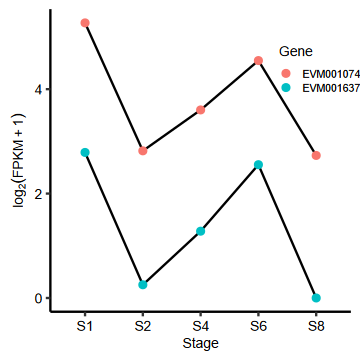

In [7]:
options(repr.plot.width=3, repr.plot.height=3)
Figure6B <- fpkm %>%
    dplyr::filter(Gene %in% c("EVM0010743","EVM0016376")) %>%
    reshape2::melt(id='Gene')  %>%
    mutate(Stage=str_extract(variable,"-(\\w+)_")) %>%
    mutate(Stage=gsub("[-_]","",Stage)) %>%
    mutate(Loquat=str_extract(variable,"(\\w+)-")) %>%
    mutate(Loquat=gsub("-","",Loquat)) %>%
    dplyr::filter(Loquat=="ZP65") %>%
    mutate(value=log2(value+1)) %>%
    group_by(Gene,Stage) %>%
    summarise(value=median(value)) %>%
    ggplot(aes(Stage,value,group=Gene))+
        geom_line()+
        geom_point(aes(fill=Gene,color=Gene))+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
               axis.text.x = element_text(angle=0),
              legend.position=c(0.9,0.8),strip.text = element_text(size = 8, colour = "black"),
              strip.background = element_rect(color="white",fill='white'),
          panel.background = element_blank(),
          legend.key.size = unit(0.3, "cm"),legend.text = element_text(size = 6, color = "black"),
          legend.title = element_text(size = 8,color = "black"),legend.background = element_blank(),
             axis.line = element_line(colour = "black",size = 0.5))+
    ylab(expression(log[2](FPKM+1)))
Figure6B

`summarise()` has grouped output by 'Gene'. You can override using the `.groups` argument.


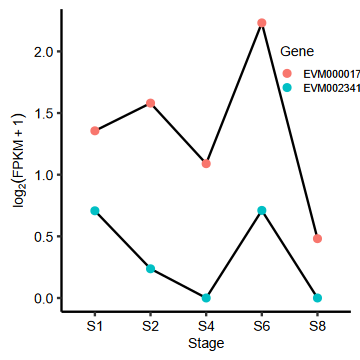

In [8]:
options(repr.plot.width=3, repr.plot.height=3)
Figure6C <- fpkm %>%
    dplyr::filter(Gene %in% c("EVM0023416","EVM0000173")) %>%
    reshape2::melt(id='Gene')  %>%
    mutate(Stage=str_extract(variable,"-(\\w+)_")) %>%
    mutate(Stage=gsub("[-_]","",Stage)) %>%
    mutate(Loquat=str_extract(variable,"(\\w+)-")) %>%
    mutate(Loquat=gsub("-","",Loquat)) %>%
    dplyr::filter(Loquat=="ZP65") %>%
    mutate(value=log2(value+1)) %>%
    group_by(Gene,Stage) %>%
    summarise(value=median(value)) %>%
    ggplot(aes(Stage,value,group=Gene))+
        geom_line()+
        geom_point(aes(fill=Gene,color=Gene))+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
               axis.text.x = element_text(angle=0),
              legend.position=c(0.9,0.8),strip.text = element_text(size = 8, colour = "black"),
              strip.background = element_rect(color="white",fill='white'),
          panel.background = element_blank(),
          legend.key.size = unit(0.3, "cm"),legend.text = element_text(size = 6, color = "black"),
          legend.title = element_text(size = 8,color = "black"),legend.background = element_blank(),
             axis.line = element_line(colour = "black",size = 0.5))+
    ylab(expression(log[2](FPKM+1)))
Figure6C

`geom_smooth()` using formula = 'y ~ x'


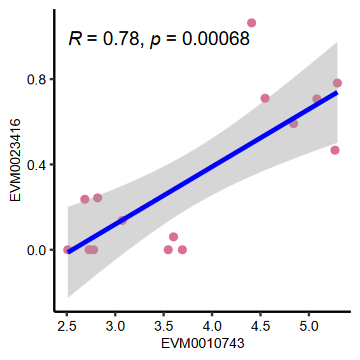

In [9]:
options(repr.plot.width=3, repr.plot.height=3)
Figure6D <- fpkm %>%
    dplyr::filter(Gene %in% c("EVM0010743","EVM0023416")) %>%
    reshape2::melt(id='Gene')  %>%
    mutate(Stage=str_extract(variable,"-(\\w+)_")) %>%
    mutate(Stage=gsub("[-_]","",Stage)) %>%
    mutate(Loquat=str_extract(variable,"(\\w+)-")) %>%
    mutate(Loquat=gsub("-","",Loquat)) %>%
    dplyr::filter(Loquat=="ZP65") %>%
    dplyr::select(Gene,variable,value) %>%
    mutate(value=log2(value+1)) %>%
    spread(.,Gene,value) %>%
    ggplot(aes(EVM0010743,EVM0023416))+
        geom_point(color='#DB7093')+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
  stat_cor()+
  geom_smooth(method = "lm", se = TRUE,color='blue')
Figure6D

`geom_smooth()` using formula = 'y ~ x'


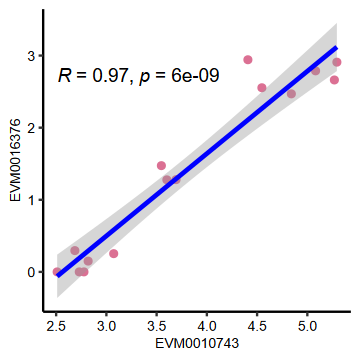

In [10]:
options(repr.plot.width=3, repr.plot.height=3)
Figure6E <- fpkm %>%
    dplyr::filter(Gene %in% c("EVM0010743","EVM0041262","EVM0016376","EVM0013185","EVM0030332","EVM0013675","EVM0030425","EVM0014957")) %>%
    reshape2::melt(id='Gene')  %>%
    mutate(Stage=str_extract(variable,"-(\\w+)_")) %>%
    mutate(Stage=gsub("[-_]","",Stage)) %>%
    mutate(Loquat=str_extract(variable,"(\\w+)-")) %>%
    mutate(Loquat=gsub("-","",Loquat)) %>%
    dplyr::filter(Loquat=="ZP65") %>%
    dplyr::select(Gene,variable,value) %>%
    mutate(value=log2(value+1)) %>%
    spread(.,Gene,value) %>%
    ggplot(aes(EVM0010743,EVM0016376))+
        geom_point(color='#DB7093')+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
  stat_cor()+
  geom_smooth(method = "lm", se = TRUE,color='blue')
Figure6E

`geom_smooth()` using formula = 'y ~ x'


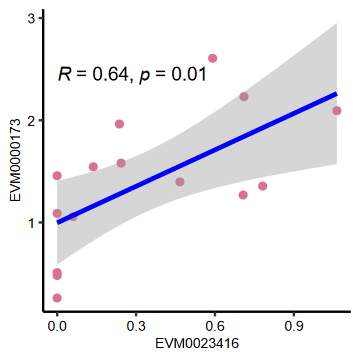

In [11]:
options(repr.plot.width=3, repr.plot.height=3)
Figure6F <- fpkm %>%
    dplyr::filter(Gene %in% c("EVM0023416","EVM0000173")) %>%
    reshape2::melt(id='Gene')  %>%
    mutate(Stage=str_extract(variable,"-(\\w+)_")) %>%
    mutate(Stage=gsub("[-_]","",Stage)) %>%
    mutate(Loquat=str_extract(variable,"(\\w+)-")) %>%
    mutate(Loquat=gsub("-","",Loquat)) %>%
    dplyr::filter(Loquat=="ZP65") %>%
    dplyr::select(Gene,variable,value) %>%
    mutate(value=log2(value+1)) %>%
    spread(.,Gene,value) %>%
    ggplot(aes(EVM0023416,EVM0000173))+
        geom_point(color='#DB7093')+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
  stat_cor()+
  geom_smooth(method = "lm", se = TRUE,color='blue')
Figure6F

In [12]:
load("07_features/target_genes.RData")

In [13]:
target.genes$Total <- apply(target.genes[,-1],1,sum)

In [14]:
target.genes2 <- target.genes %>%
    arrange(desc(Total)) %>%
    dplyr::filter(Total>=5)

In [15]:
load("06_counts/DEGs.RData")

In [16]:
auxin <- c("EVM0040814","EVM0024713","EVM0022504","EVM0016915","EVM0024929","EVM0038180","EVM0043264","EVM0028031","EVM0037527","EVM0003783","EVM0008001","EVM0001937","EVM0020857","EVM0017498","EVM0027400","EVM0001616","EVM0002461","EVM0004175","EVM0042677","EVM0027362","EVM0041302","EVM0043467","EVM0019912","EVM0001900","EVM0022312","EVM0012222","EVM0011012","EVM0000886","EVM0036289","EVM0040487","EVM0026840","EVM0006053","EVM0026629","EVM0031635","EVM0038220","EVM0009205","EVM0034009","EVM0037117","EVM0007610","EVM0018623","EVM0043502","EVM0001357","EVM0020538","EVM0003176","EVM0012056","EVM0019672","EVM0019397","EVM0005286","EVM0039242","EVM0035364","EVM0017201","EVM0010783","EVM0000173","EVM0025167")

In [17]:
GA <- read.table("09_GA/SS_GA.outfmt")

In [18]:
GA <- GA %>%
    mutate(Gene=str_extract(V1,"(\\w+).")) %>%
    mutate(Gene=gsub("\\.","",Gene))

In [19]:
GA_expr <- fpkm %>%
        dplyr::filter(Gene %in% c("EVM0010743",GA$Gene)) %>%
        reshape2::melt(id='Gene')  %>%
        mutate(Stage=str_extract(variable,"-(\\w+)_")) %>%
        mutate(Stage=gsub("[-_]","",Stage)) %>%
        mutate(Loquat=str_extract(variable,"(\\w+)-")) %>%
        mutate(Loquat=gsub("-","",Loquat)) %>%
        dplyr::filter(Loquat=="ZP65") %>%
        dplyr::select(Gene,variable,value) %>%
        mutate(value=log2(value+1)) %>%
        spread(.,Gene,value)

In [20]:
GA_top5 <- GA_expr %>%
    dplyr::select(-variable) %>%
    cor() %>%
    reshape2::melt() %>%
    dplyr::filter(Var1=="EVM0010743") %>%
    dplyr::filter(Var1!=Var2) %>%
    arrange(desc(value)) %>%
    dplyr::filter(Var2 %in% DEGs$gene) %>%
    head(5)

Warning message in cor(.):
"the standard deviation is zero"


In [21]:
auxin_expr <- fpkm %>%
        dplyr::filter(Gene %in% c("EVM0023416",auxin)) %>%
        reshape2::melt(id='Gene')  %>%
        mutate(Stage=str_extract(variable,"-(\\w+)_")) %>%
        mutate(Stage=gsub("[-_]","",Stage)) %>%
        mutate(Loquat=str_extract(variable,"(\\w+)-")) %>%
        mutate(Loquat=gsub("-","",Loquat)) %>%
        dplyr::filter(Loquat=="ZP65") %>%
        dplyr::select(Gene,variable,value) %>%
        mutate(value=log2(value+1)) %>%
        spread(.,Gene,value)

In [22]:
auxin_top5 <- auxin_expr %>%
    dplyr::select(-variable) %>%
    cor() %>%
    reshape2::melt() %>%
    dplyr::filter(Var1=="EVM0023416") %>%
    dplyr::filter(Var1!=Var2) %>%
    arrange(desc(value)) %>%
    dplyr::filter(Var2 %in% DEGs$gene) %>%
    head(5)

In [23]:
bed <- read.table("genome/SS_gene.bed")

In [29]:
bed <- bed %>%
    dplyr::select(Var2=V1,V2,V3,V4)

In [ ]:
EVM0003074
Chr15:12382329
EVM0023416

In [ ]:
Chr15:12382329 EVM0023416 Chr15	EVM	transcript	12397914	12400328	 + 
EVM0010743 Chr04:15071688 Chr04	EVM	transcript	15065593	15067094	.	+

In [ ]:
EVM0042677
EVM0032933

In [33]:
rbind(auxin_top5, GA_top5) %>%
    inner_join(bed) %>%
    arrange(Var1,V2,V3)

Joining with `by = join_by(Var2)`


Var1,Var2,value,V2,V3,V4
<fct>,<chr>,<dbl>,<chr>,<int>,<int>
EVM0023416,EVM0036289,0.5650483,Chr04,23907497,23915025
EVM0023416,EVM0018623,0.6447002,Chr08,29923283,29938457
EVM0023416,EVM0000173,0.6397161,Chr12,1820508,1824059
EVM0023416,EVM0043264,0.7036409,Chr14,25069009,25072836
EVM0023416,EVM0042677,0.5600994,Chr16,6607630,6610670
EVM0010743,EVM0016376,0.9651526,Chr02,2078567,2086609
EVM0010743,EVM0036541,0.8003130,Chr03,44564589,44566429
EVM0010743,EVM0004464,0.7872065,Chr08,33678088,33679678
EVM0010743,EVM0003074,0.8994378,Chr15,11549237,11557249


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


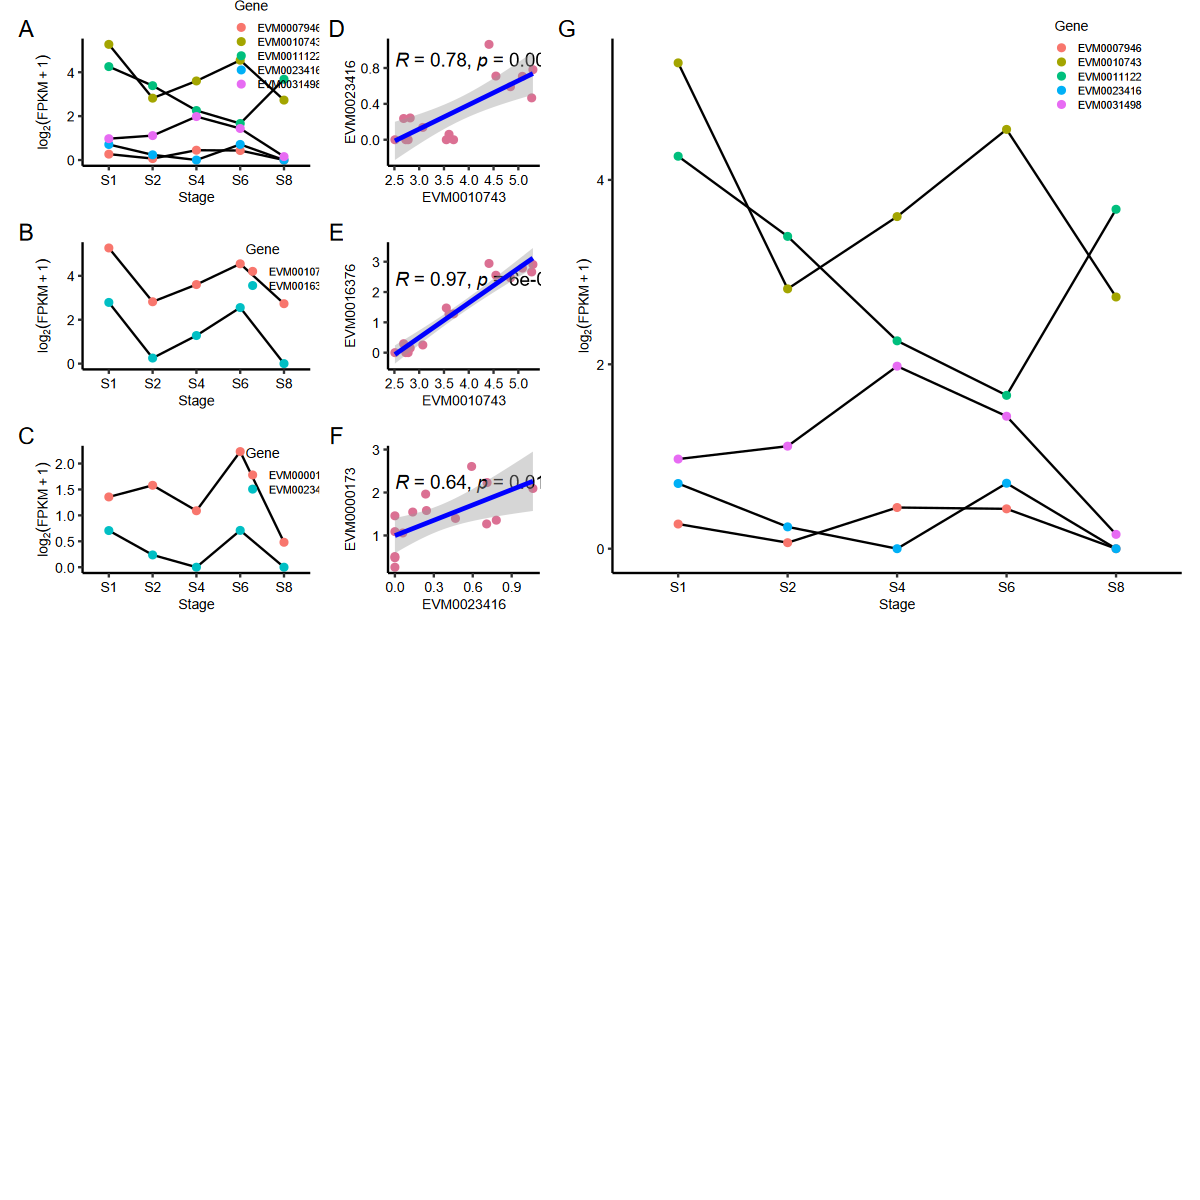

In [24]:
options(repr.plot.width=10, repr.plot.height=10)
((((Figure6A/Figure6B/Figure6C)|(Figure6D/Figure6E/Figure6F)|Figure6A)+plot_layout(width=c(1.2,0.8,3)))/
(plot_spacer())/plot_spacer())+plot_layout(height=c(2,1,1))+plot_annotation(tag_levels='A')

In [31]:
#pdf("Figures\\Figure 66.pdf",width=10,height=10)
#((((Figure6A/Figure6B/Figure6C)|(Figure6D/Figure6E/Figure6F)|Figure6A)+plot_layout(width=c(1.2,0.8,3)))/
#(plot_spacer())/plot_spacer())+plot_layout(height=c(2,1,1))+plot_annotation(tag_levels='A')
#dev.off()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


pdf 
  2

In [29]:
options(repr.plot.width=3, repr.plot.height=3)
GA_pic <- NULL
for(genes in c("EVM0003074","EVM0036541","EVM0004464","EVM0032933")){
    tmp <- GA_expr[,c("EVM0010743",genes)]
    colnames(tmp) <- c('V1','V2')
    pic <- tmp %>%
        ggplot(aes(V1,V2))+
            geom_point(color='#DB7093')+
        theme(axis.text=element_text(size=8,color='black'),
                  axis.title=element_text(size=8),
                  panel.background = element_blank(),
              legend.position="none",
                 axis.line = element_line(colour = "black",size = 0.5))+
      stat_cor()+
      geom_smooth(method = "lm", se = TRUE,color='blue')+
    xlab("EVM0010743")+ylab(genes)
    GA_pic[[genes]] <- pic
}

In [27]:
GA_top5

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,EVM0010743,EVM0016376,0.9651526
2,EVM0010743,EVM0003074,0.8994378
3,EVM0010743,EVM0036541,0.8003130
4,EVM0010743,EVM0004464,0.7872065
5,EVM0010743,EVM0032933,0.7722992


In [26]:
options(repr.plot.width=3, repr.plot.height=3)
auxin_pic <- NULL
for(genes in c("EVM0036289","EVM0018623","EVM0042677","EVM0043264")){
    tmp <- auxin_expr[,c("EVM0023416",genes)]
    colnames(tmp) <- c('V1','V2')
    pic <- tmp %>%
        ggplot(aes(V1,V2))+
            geom_point(color='#DB7093')+
        theme(axis.text=element_text(size=8,color='black'),
                  axis.title=element_text(size=8),
                  panel.background = element_blank(),
              legend.position="none",
                 axis.line = element_line(colour = "black",size = 0.5))+
      stat_cor()+
      geom_smooth(method = "lm", se = TRUE,color='blue')+
    xlab("EVM0023416")+ylab(genes)
    auxin_pic[[genes]] <- pic
}

In [31]:
fasta <- readAAMultipleAlignment("08_plantcare//GASA6.align.fasta")

In [32]:
FigureS61 <- ggmsa(fasta,char_width = 0.7,start=1,end=59,seq_name=T)
FigureS62 <- ggmsa(fasta,char_width = 0.7,start=60,end=116,seq_name=T)

Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's fill values."
Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's fill values."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


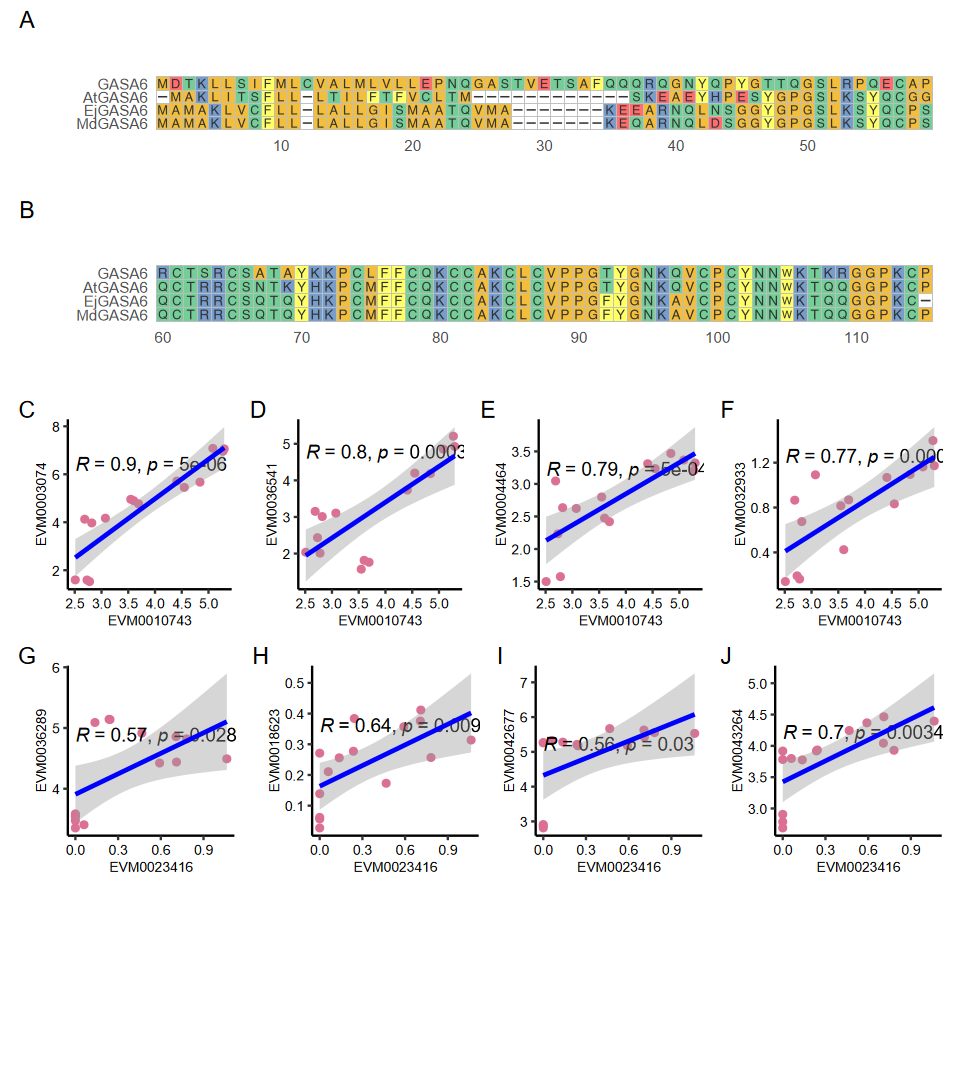

In [34]:
options(repr.plot.width=8, repr.plot.height=9)
(as.ggplot(FigureS61)/as.ggplot(FigureS62)/
 (GA_pic[['EVM0003074']]|GA_pic[['EVM0036541']]|GA_pic[['EVM0004464']]|GA_pic[['EVM0032933']])/
 (auxin_pic[['EVM0036289']]|auxin_pic[['EVM0018623']]|auxin_pic[['EVM0042677']]|auxin_pic[['EVM0043264']])/
 plot_spacer())+plot_annotation(tag_levels='A')

In [35]:
#pdf("Figures\\Figure S6.pdf",width=8,height=9)
#(as.ggplot(FigureS61)/as.ggplot(FigureS62)/
#(GA_pic[['EVM0003074']]|GA_pic[['EVM0036541']]|GA_pic[['EVM0004464']]|GA_pic[['EVM0032933']])/
#(auxin_pic[['EVM0036289']]|auxin_pic[['EVM0018623']]|auxin_pic[['EVM0042677']]|auxin_pic[['EVM0043264']])/
#plot_spacer())+plot_annotation(tag_levels='A')
#dev.off()

Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's fill values."
Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's fill values."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


pdf 
  2